# Car Price Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\CSC 2020\OneDrive\Documents\car data.csv", parse_dates = ['Year'])

# Preview of the data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014-01-01,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013-01-01,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017-01-01,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011-01-01,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014-01-01,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_Name       301 non-null    object        
 1   Year           301 non-null    datetime64[ns]
 2   Selling_Price  301 non-null    float64       
 3   Present_Price  301 non-null    float64       
 4   Driven_kms     301 non-null    int64         
 5   Fuel_Type      301 non-null    object        
 6   Selling_type   301 non-null    object        
 7   Transmission   301 non-null    object        
 8   Owner          301 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301,301.000000,301.000000,301.000000,301.000000
mean,2013-08-17 22:53:01.395348736,4.661296,7.628472,36947.205980,0.043189
min,2003-01-01 00:00:00,0.100000,0.320000,500.000000,0.000000
25%,2012-01-01 00:00:00,0.900000,1.200000,15000.000000,0.000000
50%,2014-01-01 00:00:00,3.600000,6.400000,32000.000000,0.000000
75%,2016-01-01 00:00:00,6.000000,9.900000,48767.000000,0.000000
max,2018-01-01 00:00:00,35.000000,92.600000,500000.000000,3.000000
std,NaN,5.082812,8.642584,38886.883882,0.247915


In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(2)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'Car_Name':
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Av

In [9]:
# Extracting year
df['Year'] = df['Year'].dt.year

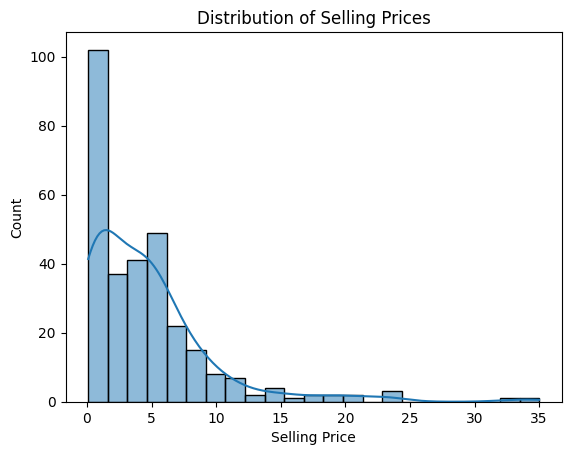

In [10]:
# Feature Distribution
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')

plt.show()

The Selling Price distribution is right-skewed, indicating:
Most used cars sell for less than ₹10 lakhs.
A few outliers exist with significantly higher prices.
This suggests potential benefits from log transformation during modeling, depending on the regression technique.

Skewness of Selling_Price: 0.1107840112840907


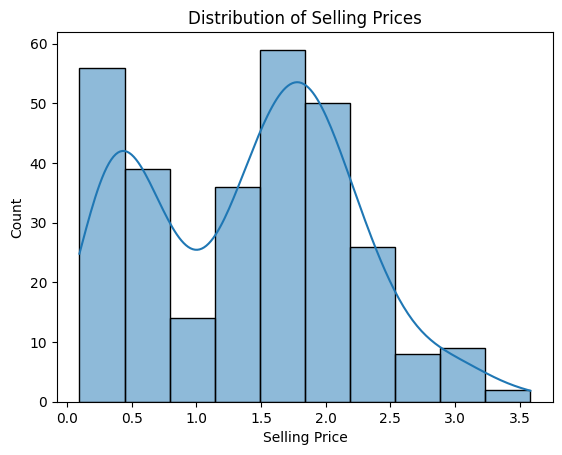

In [11]:
# Applying log transformation to Selling_Price
df['log_Price'] = np.log1p(df['Selling_Price'])

# Calculating skewness
skewness = df['log_Price'].skew()
print(f'Skewness of Selling_Price: {skewness}')

# Plotting the transformed distribution

sns.histplot(df['log_Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')

plt.show()

## Feature Engineering

In [12]:
# Extracting Car Age
df['Car_Age'] = 2025 - df['Year']

#Extracting Brand names
df['Car_Brand'] = df['Car_Name'].str.split().str[0]

# Computing Car Depreciation
df['Car_depreciation'] = (df['Present_Price'] - df['Selling_Price']).round(3)

In [13]:
# Preview of Car Brands
print(df['Car_Brand'].unique())

# Total Car Brands
print(f'Number of Car brands:', df['Car_Brand'].nunique())

['ritz' 'sx4' 'ciaz' 'wagon' 'swift' 'vitara' 's' 'alto' 'ertiga' 'dzire'
 'ignis' '800' 'baleno' 'omni' 'fortuner' 'innova' 'corolla' 'etios'
 'camry' 'land' 'Royal' 'UM' 'KTM' 'Bajaj' 'Hyosung' 'Mahindra' 'Honda'
 'Yamaha' 'TVS' 'Hero' 'Activa' 'Suzuki' 'i20' 'grand' 'i10' 'eon' 'xcent'
 'elantra' 'creta' 'verna' 'city' 'brio' 'amaze' 'jazz']
Number of Car brands: 44


#### Label Encoding for categorical columns

In [14]:

# Categorical columns
cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

# Label encoding
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    clean_mapping = {k: str(v) for k, v in mapping.items()}

    print(f"\n{col} mapping:")
    for code, label in clean_mapping.items():
        print(f"{code}: {label}")


Fuel_Type mapping:
CNG: 0
Diesel: 1
Petrol: 2

Selling_type mapping:
Dealer: 0
Individual: 1

Transmission mapping:
Automatic: 0
Manual: 1


#### Target encoding for car Brand

In [15]:
# Compute the mean Selling_Price for each Car_Brand
brand_price_mean = df.groupby('Car_Brand')['Selling_Price'].mean()

# Map this mean to the original df
df['Car_Brand_TargetEnc'] = df['Car_Brand'].map(brand_price_mean)

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Price,Car_Age,Car_Brand,Car_depreciation,Car_Brand_TargetEnc
0,ritz,2014,3.35,5.59,27000,2,0,1,0,1.470176,11,ritz,2.24,2.862500
1,sx4,2013,4.75,9.54,43000,1,0,1,0,1.749200,12,sx4,4.79,3.158333
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,2.110213,8,ciaz,2.60,7.472222
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,1.348073,14,wagon,1.30,2.512500
4,swift,2014,4.60,6.87,42450,1,0,1,0,1.722767,11,swift,2.27,4.540000


### Correlation Check

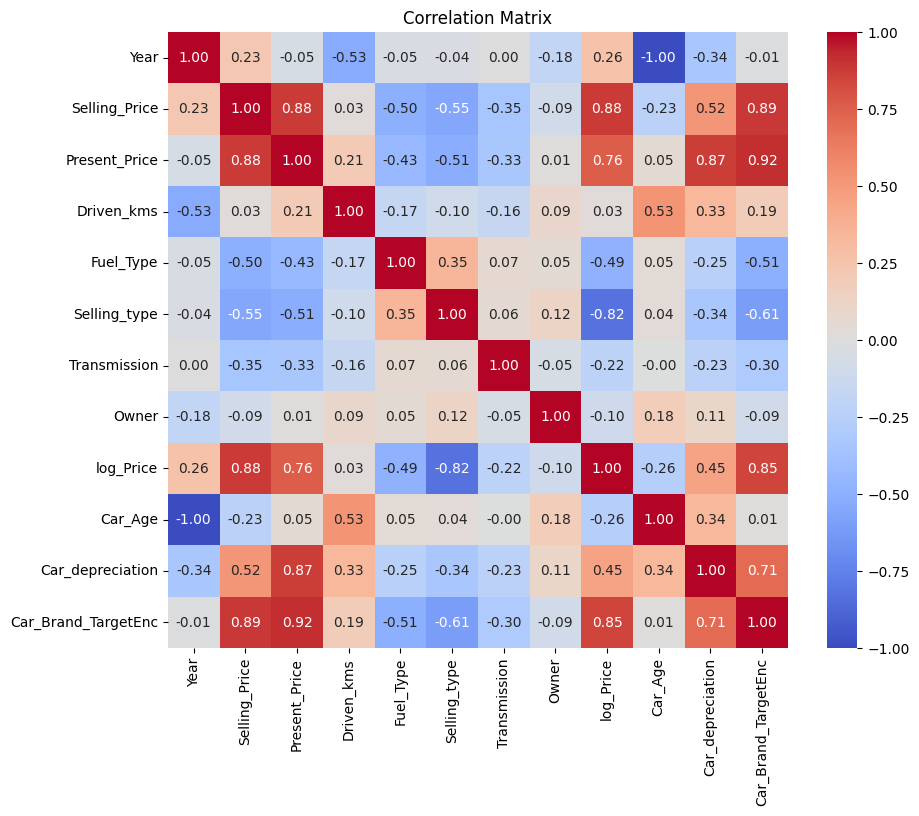

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#####  Feature Reduction Based on Correlation

From the correlation heatmap, we observed strong multicollinearity among `Selling_Price`, `Present_Price`, and `Year`. To reduce redundancy and enhance model generalization, these features were removed. The resulting dataset retains only minimally correlated variables, improving both model interpretability and predictive performance.

In [18]:
# Drop specified highly correlated and Redundant columns
df_model = df.drop(columns=['Car_Name','Car_Brand','Present_Price', 'Year', 'Selling_Price'])
df_model.head()

,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Price,Car_Age,Car_depreciation,Car_Brand_TargetEnc
0,27000,2,0,1,0,1.470176,11,2.24,2.862500
1,43000,1,0,1,0,1.749200,12,4.79,3.158333
2,6900,2,0,1,0,2.110213,8,2.60,7.472222
3,5200,2,0,1,0,1.348073,14,1.30,2.512500
4,42450,1,0,1,0,1.722767,11,2.27,4.540000


## Model Building

In [21]:
# Imputing Features and Target
X = df_model.drop(columns=['log_Price'])  # Features
y = df['log_Price']  # Target

# Splitting Data int Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Standardizing features for linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Training Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Training Random Forest (no need to scale)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating models
def evaluate_model(model, X, y_true, name="Model"):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n  RMSE: {rmse:.4f}\n  R² Score: {r2:.4f}\n")

evaluate_model(lr_model, X_test_scaled, y_test, "Linear Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest Regressor")

Linear Regression:
  RMSE: 0.3274
  R² Score: 0.8358

Random Forest Regressor:
  RMSE: 0.1514
  R² Score: 0.9649



Random Forest Regressor outperformed Linear Regression, achieving a significantly lower RMSE (0.1514 vs. 0.3274) and a higher R² score (0.9649 vs. 0.8358), indicating better predictive accuracy and a stronger ability to capture complex patterns in the data.